In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

youtube=pd.read_csv("C:/Users/neslihan.kumbasar/bootcamp/youtube_winsorize.csv", index_col=0)
youtube.head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_abone_sayisi,winsorize_goruntulenme_sayisi
0,1st,A++,Zee TV,82757.000,18752952.000,20869786591,5653.000,5895361.000,2468241402
1,2nd,A++,T-Series,12661.000,61196304.000,47548839843,5653.000,5895361.000,2468241402
2,3rd,A++,Cocomelon - Nursery Rhymes,373.000,19238252.000,9793305082,373.000,5895361.000,2468241402
3,4th,A++,SET India,27323.000,31180560.000,22675948293,5653.000,5895361.000,2468241402
4,5th,A++,WWE,36756.000,32852346.000,26273668433,5653.000,5895361.000,2468241402


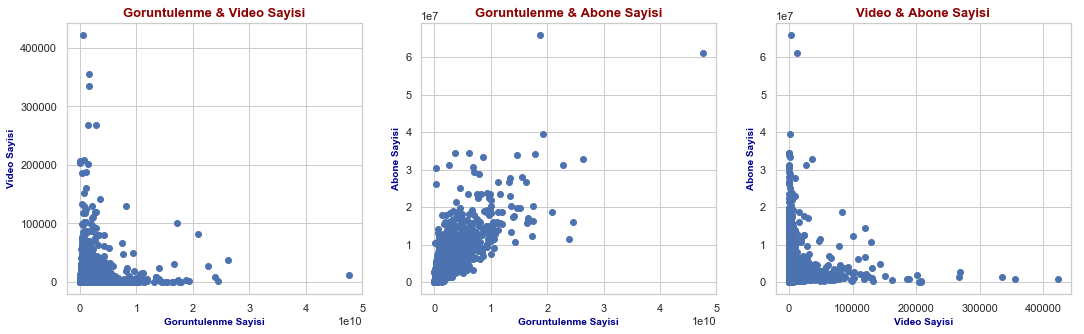

In [2]:
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(youtube["goruntulenme_sayisi"], youtube["video_sayisi"])
plt.title("Goruntulenme & Video Sayisi", fontdict=baslik_font)
plt.xlabel("Goruntulenme Sayisi", fontdict=eksen_font)
plt.ylabel("Video Sayisi", fontdict=eksen_font)

plt.subplot(1,3,2)
plt.scatter(youtube["goruntulenme_sayisi"], youtube["abone_sayisi"])
plt.title("Goruntulenme & Abone Sayisi", fontdict=baslik_font)
plt.xlabel("Goruntulenme Sayisi", fontdict=eksen_font)
plt.ylabel("Abone Sayisi", fontdict=eksen_font)

plt.subplot(1,3,3)
plt.scatter(youtube["video_sayisi"], youtube["abone_sayisi"])
plt.title("Video & Abone Sayisi", fontdict=baslik_font)
plt.xlabel("Video Sayisi", fontdict=eksen_font)
plt.ylabel("Abone Sayisi", fontdict=eksen_font)
plt.show()

In [3]:
ogrenciler=pd.read_csv("C:/Users/neslihan.kumbasar/bootcamp/StudentsPerformance.csv")
ogrenciler.columns=['cinsiyet','koken','aile_egt_seviyesi','ogle_yemegi','hazirlik_kursu','matematik_notu','okuma_notu','yazma_notu']

ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0, 0.5, 'Yazma Notu')

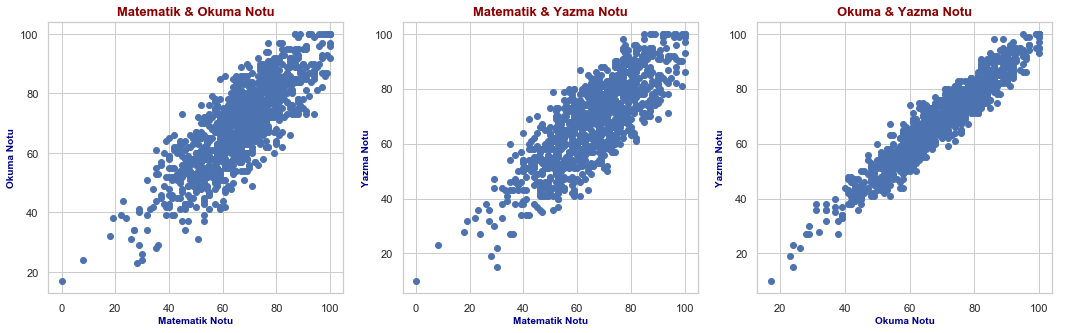

In [4]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(ogrenciler["matematik_notu"],ogrenciler["okuma_notu"])
plt.title("Matematik & Okuma Notu", fontdict=baslik_font)
plt.xlabel("Matematik Notu",fontdict=eksen_font)
plt.ylabel("Okuma Notu",fontdict=eksen_font)

plt.subplot(1,3,2)
plt.scatter(ogrenciler["matematik_notu"],ogrenciler["yazma_notu"])
plt.title("Matematik & Yazma Notu", fontdict=baslik_font)
plt.xlabel("Matematik Notu",fontdict=eksen_font)
plt.ylabel("Yazma Notu",fontdict=eksen_font)

plt.subplot(1,3,3)
plt.scatter(ogrenciler["okuma_notu"],ogrenciler["yazma_notu"])
plt.title("Okuma & Yazma Notu", fontdict=baslik_font)
plt.xlabel("Okuma Notu",fontdict=eksen_font)
plt.ylabel("Yazma Notu",fontdict=eksen_font)

In [5]:
youtube.corr()

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_abone_sayisi,winsorize_goruntulenme_sayisi
video_sayisi,1.000,0.011,0.092,0.474,0.013,0.135
abone_sayisi,0.011,1.000,0.784,0.083,0.778,0.627
goruntulenme_sayisi,0.092,0.784,1.000,0.219,0.579,0.700
winsorize_video_sayisi,0.474,0.083,0.219,1.000,0.098,0.308
winsorize_abone_sayisi,0.013,0.778,0.579,0.098,1.000,0.743
winsorize_goruntulenme_sayisi,0.135,0.627,0.700,0.308,0.743,1.000


In [6]:
ogrenciler.corr()

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000,0.818,0.803
okuma_notu,0.818,1.000,0.955
yazma_notu,0.803,0.955,1.000


In [7]:
korelasyon_mat_youtube=youtube.corr()
korelasyon_mat_ogrenciler=ogrenciler.corr()
display(korelasyon_mat_youtube,korelasyon_mat_ogrenciler)

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_abone_sayisi,winsorize_goruntulenme_sayisi
video_sayisi,1.000,0.011,0.092,0.474,0.013,0.135
abone_sayisi,0.011,1.000,0.784,0.083,0.778,0.627
goruntulenme_sayisi,0.092,0.784,1.000,0.219,0.579,0.700
winsorize_video_sayisi,0.474,0.083,0.219,1.000,0.098,0.308
winsorize_abone_sayisi,0.013,0.778,0.579,0.098,1.000,0.743
winsorize_goruntulenme_sayisi,0.135,0.627,0.700,0.308,0.743,1.000


,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000,0.818,0.803
okuma_notu,0.818,1.000,0.955
yazma_notu,0.803,0.955,1.000


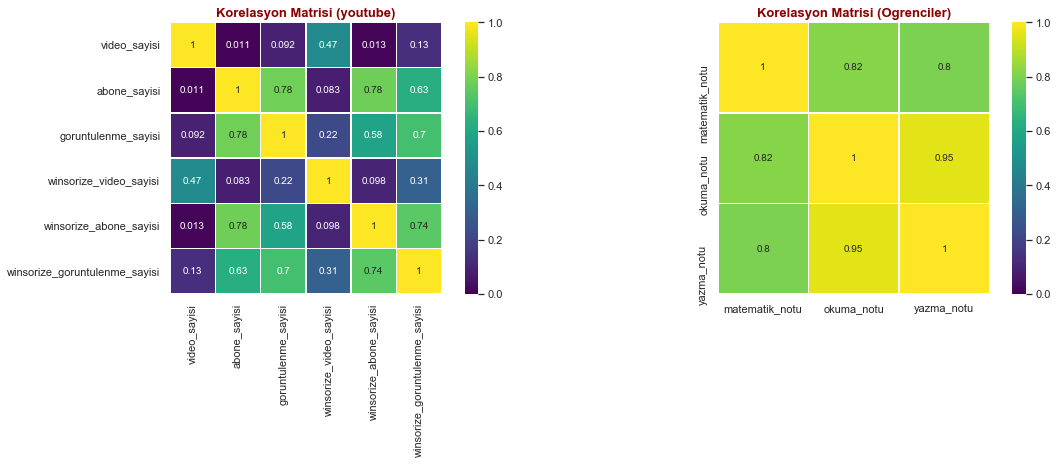

In [8]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(korelasyon_mat_youtube,square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (youtube)", fontdict=baslik_font)

plt.subplot(1,2,2)
sns.heatmap(korelasyon_mat_ogrenciler,square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Ogrenciler)", fontdict=baslik_font)

plt.show()

In [9]:
youtube.groupby("derece").mean()

,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_abone_sayisi,winsorize_goruntulenme_sayisi
derece,,,,,,
A,5353.923,4931877.510,2356715490.963,1675.312,3398754.609,1447001618.042
A+,16547.927,11504827.171,6053120621.049,2729.878,5061679.000,2088445273.927
A++,37450.700,22281762.900,21199091192.800,4673.700,5590006.000,2468241402.000
A-,4136.515,2784051.111,1041149249.383,1319.477,2329109.536,881069334.142
B+,2987.169,1620059.628,525915832.166,1120.131,1513428.975,508566805.330


Text(0.5, 1.0, 'Ortalama Goruntulenme Sayisi')

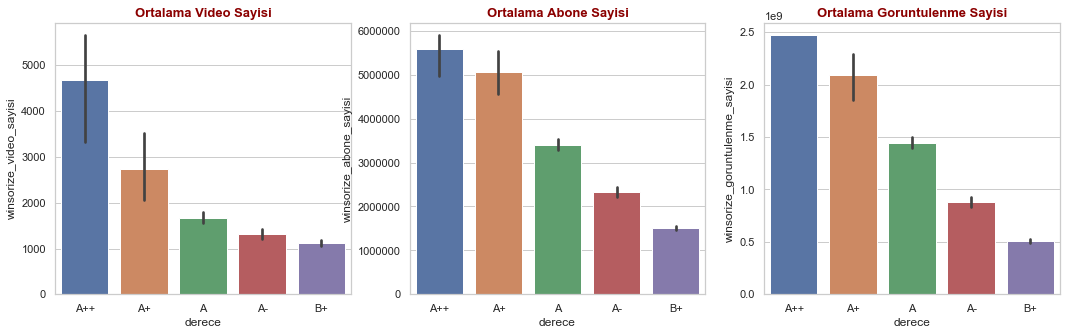

In [10]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(youtube["derece"], youtube["winsorize_video_sayisi"])
plt.title("Ortalama Video Sayisi", fontdict=baslik_font)

plt.subplot(1,3,2)
sns.barplot(youtube["derece"], youtube["winsorize_abone_sayisi"])
plt.title("Ortalama Abone Sayisi", fontdict=baslik_font)

plt.subplot(1,3,3)
sns.barplot(youtube["derece"], youtube["winsorize_goruntulenme_sayisi"])
plt.title("Ortalama Goruntulenme Sayisi", fontdict=baslik_font)

In [13]:
dereceler=youtube["derece"].unique()
grup_youtube=youtube.groupby("derece")
pd.options.display.float_format = '{:.15f}'.format
for var in ["winsorize_video_sayisi","winsorize_abone_sayisi","winsorize_goruntulenme_sayisi"]:
    karsilastirma=pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} icin karsilastirma".format(var),end='')
    for i in range(0,len(dereceler)):
        for j in range(i+1,len(dereceler)):
            ttest=stats.ttest_ind(youtube[youtube["derece"]==dereceler[i]][var],
                                  youtube[youtube["derece"]==dereceler[j]][var])
            grup_1=dereceler[i]
            grup_2=dereceler[j]
            istatistik=ttest[0]
            p_degeri=ttest[1]
            
            karsilastirma=karsilastirma.append({"grup_1": grup_1,
                                              "grup_2":grup_2,
                                              "istatistik":istatistik,
                                              "p_degeri":p_degeri}, ignore_index=True )
    display(karsilastirma)       



winsorize_video_sayisi icin karsilastirma

,grup_1,grup_2,istatistik,p_degeri
0,A++,A+,2.370107597680390,0.021763528688882
1,A++,A,4.635430403314838,0.000004046915858
2,A++,A-,5.849570397069131,0.000000006610447
3,A++,B+,6.895263284493901,0.000000000006542
4,A+,A,3.226986753862891,0.001291484868968
5,A+,A-,4.847071765045587,0.000001439371760
6,A+,B+,6.250454348650543,0.000000000467265
7,A,A-,4.134406362300212,0.000037067474856
8,A,B+,8.632504468648667,0.000000000000000
9,A-,B+,3.287452883152387,0.001019753582834


winsorize_abone_sayisi icin karsilastirma

,grup_1,grup_2,istatistik,p_degeri
0,A++,A+,0.984160033103640,0.329871570488523
1,A++,A,3.608536727425489,0.000323610742355
2,A++,A-,5.868324550537312,0.000000005926150
3,A++,B+,9.135367813318059,0.000000000000000
4,A+,A,5.471175309584620,0.000000056451392
5,A+,A-,9.808348314786624,0.000000000000000
6,A+,B+,15.969844689123493,0.000000000000000
7,A,A-,12.993330867044360,0.000000000000000
8,A,B+,32.813612334224260,0.000000000000000
9,A-,B+,14.941009954835812,0.000000000000000


winsorize_goruntulenme_sayisi icin karsilastirma

,grup_1,grup_2,istatistik,p_degeri
0,A++,A+,1.569203260330293,0.123036409158845
1,A++,A,3.621975365674819,0.000307463931377
2,A++,A-,6.565929030789834,0.000000000081776
3,A++,B+,11.469859149388137,0.000000000000000
4,A+,A,4.538723264848895,0.000006344392750
5,A+,A-,9.923990388605031,0.000000000000000
6,A+,B+,18.478400874854195,0.000000000000000
7,A,A-,15.231589446072988,0.000000000000000
8,A,B+,39.285524343410707,0.000000000000000
9,A-,B+,16.964455044626160,0.000000000000000


In [14]:
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
adet_tablosu=pd.crosstab(ogrenciler["cinsiyet"],ogrenciler["koken"])
adet_tablosu

koken,group A,group B,group C,group D,group E
cinsiyet,,,,,
female,36,104,180,129,69
male,53,86,139,133,71


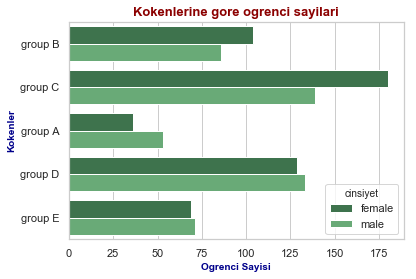

In [16]:
sns.countplot(y="koken", hue="cinsiyet", data=ogrenciler, palette="Greens_d")
plt.title("Kokenlerine gore ogrenci sayilari", fontdict=baslik_font)
plt.xlabel("Ogrenci Sayisi", fontdict=eksen_font)
plt.ylabel("Kokenler", fontdict=eksen_font)
plt.show()

In [17]:
print(stats.chisquare(adet_tablosu, axis=None))

Power_divergenceResult(statistic=181.70000000000002, pvalue=2.237210012745866e-34)
